In [360]:
import pandas as pd
import numpy as np
import IPython.display
from sklearn.cluster import KMeans
from sklearn import preprocessing
import matplotlib.pyplot as plt

**Import file xls**

In [361]:
file_name = 'data-uas.csv'
df = pd.read_csv(file_name)

**(pre-processing)**
Drop atribut "branch", "cutoff_date", "area", "region", "first_date_disbursement", "deliquency_rate". Atribut-atribut tersebt dihilangkan katena tidak terlalu memberikan pengaruh signifikan dalam pengolahan untuk mengambil insight dari data. 

In [362]:
pre_df = df.drop(df.columns[[0, 1, 2, 4, 7, 8, 9]], axis=1)
IPython.display.HTML(pre_df.to_html())

,region,active_borrowers,active_agent,weekly_new_borrower_per_bp
0,REGION_JH,1515.0,7.0,1
1,REGION_JH,1092.0,5.0,7
2,REGION_JH,1973.0,8.0,4
3,REGION_JH,1258.0,9.0,4
4,REGION_JH,314.0,3.0,14
5,REGION_JH,257.0,2.0,17
6,REGION_JH,1586.0,7.0,5
7,REGION_JH,277.0,2.0,18
8,REGION_JH,146.0,2.0,1
9,REGION_JH,98.0,1.0,24


In [363]:
a=pre_df.notnull()
IPython.display.HTML(a.to_html())

,region,active_borrowers,active_agent,weekly_new_borrower_per_bp
0,True,True,True,True
1,True,True,True,True
2,True,True,True,True
3,True,True,True,True
4,True,True,True,True
5,True,True,True,True
6,True,True,True,True
7,True,True,True,True
8,True,True,True,True
9,True,True,True,True


**(pre-processing)** Karena beberapa atribut terdapat row yang bernilai Null/NaN, tetapi jumlah row yang bernilai Null/NaN untuk setiap atributya tidak terlalu banyak, maka pre-processing yang dilakukan adalah menghapus row tersebut karena tidak akan mengganggu hasil cluster yang akan dibentuk nantinya.   

In [364]:
if ' weekly_new_borrower_per_bp ' in pre_df.columns:
    print("label column is present")
else:
    print("label column is not here. Popping 'label' will produce KeyError")

label column is present


In [365]:
pre_df = pre_df[pd.notnull(pre_df[' weekly_new_borrower_per_bp '])]   
pre_df = pre_df[pre_df[' weekly_new_borrower_per_bp '] != " -   "]
IPython.display.HTML(pre_df.to_html())

,region,active_borrowers,active_agent,weekly_new_borrower_per_bp
0,REGION_JH,1515.0,7.0,1
1,REGION_JH,1092.0,5.0,7
2,REGION_JH,1973.0,8.0,4
3,REGION_JH,1258.0,9.0,4
4,REGION_JH,314.0,3.0,14
5,REGION_JH,257.0,2.0,17
6,REGION_JH,1586.0,7.0,5
7,REGION_JH,277.0,2.0,18
8,REGION_JH,146.0,2.0,1
9,REGION_JH,98.0,1.0,24


In [366]:
pre_df[' weekly_new_borrower_per_bp '] = pd.to_numeric(pre_df[' weekly_new_borrower_per_bp '])
dataset = pre_df
pre_df = pre_df.drop(pre_df.columns[[0]], axis=1)
data_set = pre_df
IPython.display.HTML(data_set.to_html())

,active_borrowers,active_agent,weekly_new_borrower_per_bp
0,1515.0,7.0,1
1,1092.0,5.0,7
2,1973.0,8.0,4
3,1258.0,9.0,4
4,314.0,3.0,14
5,257.0,2.0,17
6,1586.0,7.0,5
7,277.0,2.0,18
8,146.0,2.0,1
9,98.0,1.0,24


# Mencari nilai K yang sesuai

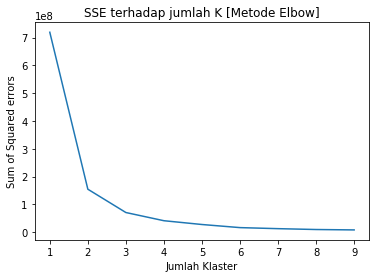

In [367]:
sse = []
for i in range (1, 10):
	kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
	kmeans.fit(data_set)
	sse.append(kmeans.inertia_)
plt.plot(range(1, 10), sse)
plt.title('SSE terhadap jumlah K [Metode Elbow]')
plt.xlabel('Jumlah Klaster')
plt.ylabel('Sum of Squared errors')
plt.show()

# Fitting K-Means ke Dataset

In [368]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(data_set)

# Memulai clustering

In [369]:
y_kmeans1 = y_kmeans
y_kmeans1 = y_kmeans1+1

# Data frame baru sebagai cluster

In [370]:
cluster = pd.DataFrame(y_kmeans1)

# Menambahkan cluster kedalam dataset

In [371]:
dataset['cluster'] = cluster
data_set['cluster'] = cluster

# Rata-rata dari cluster

In [402]:
kmeans_mean_cluster = pd.DataFrame(round(data_set.groupby('cluster').mean(),1))
print(kmeans_mean_cluster)
print()
print("NILAI SSE : ", (kmeans.inertia_))
print()
IPython.display.HTML(dataset.to_html())

         active_borrowers  active_agent   weekly_new_borrower_per_bp 
cluster                                                              
1.0                 984.1           4.4                          11.0
2.0                1012.9           4.3                          11.7
3.0                1020.0           4.7                           8.8

NILAI SSE :  70314906.37063123



,region,active_borrowers,active_agent,weekly_new_borrower_per_bp,cluster
0,REGION_JH,1515.0,7.0,1,3.0
1,REGION_JH,1092.0,5.0,7,3.0
2,REGION_JH,1973.0,8.0,4,2.0
3,REGION_JH,1258.0,9.0,4,3.0
4,REGION_JH,314.0,3.0,14,1.0
5,REGION_JH,257.0,2.0,17,1.0
6,REGION_JH,1586.0,7.0,5,3.0
7,REGION_JH,277.0,2.0,18,1.0
8,REGION_JH,146.0,2.0,1,1.0
9,REGION_JH,98.0,1.0,24,1.0


**Penetuan kelas untuk masing - masing region dengan menggunakan Modus dari atribut Klaster masing - masing region.**

In [403]:
Region_JH = dataset[dataset['region']== "REGION_JH"]
modus = int(Region_JH['cluster'].mode())
print("Class untuk REGION_JH : ", modus)
IPython.display.HTML(Region_JH.to_html())

Class untuk REGION_JH :  3


,region,active_borrowers,active_agent,weekly_new_borrower_per_bp,cluster
0,REGION_JH,1515.0,7.0,1,3.0
1,REGION_JH,1092.0,5.0,7,3.0
2,REGION_JH,1973.0,8.0,4,2.0
3,REGION_JH,1258.0,9.0,4,3.0
4,REGION_JH,314.0,3.0,14,1.0
5,REGION_JH,257.0,2.0,17,1.0
6,REGION_JH,1586.0,7.0,5,3.0
7,REGION_JH,277.0,2.0,18,1.0
8,REGION_JH,146.0,2.0,1,1.0
9,REGION_JH,98.0,1.0,24,1.0


In [404]:
Region_JR1 = dataset[dataset['region']== "REGION_JR1"]   
modus = int(Region_JR1['cluster'].mode())
print("Class untuk REGION_JR1 : ", modus)
IPython.display.HTML(Region_JR1.to_html())

Class untuk REGION_JR1 :  1


,region,active_borrowers,active_agent,weekly_new_borrower_per_bp,cluster
250,REGION_JR1,1108.0,5.0,3,2.0
251,REGION_JR1,2294.0,8.0,7,1.0
252,REGION_JR1,54.0,2.0,4,2.0
253,REGION_JR1,452.0,3.0,16,1.0
254,REGION_JR1,108.0,2.0,15,3.0
255,REGION_JR1,2057.0,8.0,5,1.0
257,REGION_JR1,1914.0,7.0,7,1.0
258,REGION_JR1,1854.0,8.0,4,1.0
259,REGION_JR1,310.0,3.0,30,2.0
260,REGION_JR1,2526.0,9.0,4,1.0


In [405]:
Region_JR2 = dataset[dataset['region']== "REGION_JR2"]   
modus = int(Region_JR2['cluster'].mode())
print("Class untuk REGION_JR2 : ", modus)
IPython.display.HTML(Region_JR2.to_html())

Class untuk REGION_JR2 :  1


,region,active_borrowers,active_agent,weekly_new_borrower_per_bp,cluster
500,REGION_JR2,683.0,3.0,17,1.0
501,REGION_JR2,243.0,2.0,15,2.0
502,REGION_JR2,516.0,3.0,22,2.0
503,REGION_JR2,434.0,3.0,17,1.0
504,REGION_JR2,82.0,2.0,19,1.0
505,REGION_JR2,716.0,3.0,24,2.0
506,REGION_JR2,2089.0,6.0,7,2.0
507,REGION_JR2,604.0,3.0,10,1.0
508,REGION_JR2,685.0,3.0,29,1.0
509,REGION_JR2,2482.0,7.0,3,1.0


In [406]:
Region_JT = dataset[dataset['region']== "REGIONID_JT"]   
modus = int(Region_JT['cluster'].mode())
print("Class untuk REGION_JT : ", modus)
IPython.display.HTML(Region_JT.to_html())

Class untuk REGION_JT :  1


,region,active_borrowers,active_agent,weekly_new_borrower_per_bp,cluster
750,REGIONID_JT,430.0,2.0,19,3.0
751,REGIONID_JT,385.0,2.0,23,3.0
752,REGIONID_JT,533.0,3.0,24,1.0
753,REGIONID_JT,1568.0,7.0,9,3.0
754,REGIONID_JT,1322.0,7.0,10,1.0
755,REGIONID_JT,1370.0,8.0,8,3.0
756,REGIONID_JT,639.0,3.0,12,1.0
757,REGIONID_JT,511.0,3.0,22,1.0
758,REGIONID_JT,1722.0,9.0,7,1.0
759,REGIONID_JT,351.0,3.0,11,3.0


In [407]:
Region_N = dataset[dataset['region']== "REGIONID_N"]   
modus = int(Region_N['cluster'].mode())
print("Class untuk REGION_N : ", modus)
IPython.display.HTML(Region_N.to_html())

Class untuk REGION_N :  1


,region,active_borrowers,active_agent,weekly_new_borrower_per_bp,cluster
1000,REGIONID_N,235.0,2.0,13,1.0
1001,REGIONID_N,424.0,2.0,6,3.0
1002,REGIONID_N,1740.0,7.0,4,1.0
1003,REGIONID_N,1152.0,8.0,5,1.0
1004,REGIONID_N,411.0,3.0,11,1.0
1005,REGIONID_N,569.0,2.0,28,3.0
1006,REGIONID_N,319.0,2.0,33,3.0
1007,REGIONID_N,295.0,2.0,2,1.0
1008,REGIONID_N,360.0,2.0,12,3.0
1009,REGIONID_N,938.0,5.0,3,1.0
